In [ ]:
!pip install nltk
!pip install spacy
!python -m spacy download es_core_news_sm
!pip install -U imbalanced-learn
!pip install pyspellchecker

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Oculta warnings
import warnings
warnings.simplefilter('ignore')

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# CARGAR DATOS

**DATOS DE ENTRENAMIENTO**

la columna de trastornos indica si el TWEET es de una persona con depresión o es de control.


**control**:     0

**ansiedad**:   1



In [ ]:
ruta_archivo_entrenamiento = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba (control vs ansiedad)/train.csv'
data_train = pd.read_csv(ruta_archivo_entrenamiento, sep=',')
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64989 entries, 0 to 64988
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USER_ID     32528 non-null  object 
 1   TWEET_ID    32528 non-null  float64
 2   TWEET_TEXT  64987 non-null  object 
 3   trastorno   64985 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.0+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,NaN,NaN,"3522.0, intenta combatir siéntete indeseable c...",1.0
1,302.0,2.147484e+09,"RT @giraltpablo: Lamentablemente, Ecuador perd...",0.0
2,NaN,NaN,Minitrigos helados ansiosos.,1.0
3,NaN,NaN,Está bien. Yo he estado ahí antes. Dudaba de m...,1.0
4,NaN,NaN,¡Siento escuchar eso! Considere la posibilidad...,1.0
5,480.0,2.147484e+09,"No entiendo eso de apoyar en una final,al equi...",0.0
6,266.0,2.147484e+09,"""Come On"" - @akapellah feat @BigSotoLuc &amp; ...",0.0
7,NaN,NaN,",Hola, chico, aparentemente tiene una enfermed...",1.0
8,390.0,2.147484e+09,"RT @excelentum: El que domina su cólera, domin...",0.0
9,288.0,2.147484e+09,RT @Guillodibujante: https://t.co/YO0oAArJJq,0.0


In [ ]:
# Verificar si hay filas nulas o vacías en la columna 'trastorno'
null_values = data_train['trastorno'].isnull().sum()

# Imprimir el número de filas nulas o vacías
print("Número de filas nulas o vacías en la columna 'trastorno':", null_values)

Número de filas nulas o vacías en la columna 'trastorno': 4


In [ ]:
# Eliminar filas con valores nulos en la columna 'trastorno'
data_train = data_train.dropna(subset=['trastorno'])

# Verificar si hay filas nulas o vacías en la columna 'trastorno' después de eliminarlas
null_values = data_train['trastorno'].isnull().sum()

# Imprimir el número de filas nulas o vacías
print("Número de filas nulas o vacías en la columna 'trastorno' después de eliminarlas:", null_values)

Número de filas nulas o vacías en la columna 'trastorno' después de eliminarlas: 0


In [ ]:
data_train['trastorno'] = data_train['trastorno'].astype('int64')
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64985 entries, 0 to 64988
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USER_ID     32524 non-null  object 
 1   TWEET_ID    32524 non-null  float64
 2   TWEET_TEXT  64985 non-null  object 
 3   trastorno   64985 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.5+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,NaN,NaN,"3522.0, intenta combatir siéntete indeseable c...",1
1,302.0,2.147484e+09,"RT @giraltpablo: Lamentablemente, Ecuador perd...",0
2,NaN,NaN,Minitrigos helados ansiosos.,1
3,NaN,NaN,Está bien. Yo he estado ahí antes. Dudaba de m...,1
4,NaN,NaN,¡Siento escuchar eso! Considere la posibilidad...,1
5,480.0,2.147484e+09,"No entiendo eso de apoyar en una final,al equi...",0
6,266.0,2.147484e+09,"""Come On"" - @akapellah feat @BigSotoLuc &amp; ...",0
7,NaN,NaN,",Hola, chico, aparentemente tiene una enfermed...",1
8,390.0,2.147484e+09,"RT @excelentum: El que domina su cólera, domin...",0
9,288.0,2.147484e+09,RT @Guillodibujante: https://t.co/YO0oAArJJq,0


In [ ]:
# Verificar si hay filas nulas o vacías en la columna 'trastorno'
null_values1 = data_train['trastorno'].isnull().sum()

# Imprimir el número de filas nulas o vacías
print("Número de filas nulas o vacías en la columna 'trastorno':", null_values1)

Número de filas nulas o vacías en la columna 'trastorno': 0


**DATOS DE PRUEBA**

In [ ]:
ruta_archivo_prueba = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba (control vs ansiedad)/test.csv'
data_test = pd.read_csv(ruta_archivo_prueba, lineterminator='\n')
data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27853 entries, 0 to 27852
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USER_ID     13894 non-null  float64
 1   TWEET_ID    13894 non-null  float64
 2   TWEET_TEXT  27853 non-null  object 
 3   trastorno   27853 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 870.5+ KB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,264.0,2.147484e+09,@sua_agu10 Wiiiinaa,0
1,NaN,NaN,¡El alcohol es lo malo! ¡No marihuana! Defende...,1
2,NaN,NaN,"Dios, ni siquiera había considerado que mi an...",1
3,NaN,NaN,"1663.0,solo dios alma espera silencio ven salv...",1
4,316.0,2.147484e+09,@andresacosta20 @latengorepetida @PANINIcol ca...,0


In [ ]:
# Verificar si hay filas nulas o vacías en la columna 'trastorno'
null = data_test['trastorno'].isnull().sum()

# Imprimir el número de filas nulas o vacías
print("Número de filas nulas o vacías en la columna 'trastorno':", null)

Número de filas nulas o vacías en la columna 'trastorno': 0


# Preparación de los datos

*Eliminar etiquedas HTML*

In [ ]:
import re

def removeHTML(text):
    if isinstance(text, str):  # Verificar si es de tipo string
        cleanr = re.compile('<.*?>')
        cleantext = re.sub(cleanr, '', text)
        return cleantext
    else:
        return text  # Devolver el valor original si no es de tipo string

*Limpiar texto*

In [ ]:
import re
import string

def clean(text):
    if isinstance(text, str):  # Verificar si es de tipo string
        # Eliminar hashtags
        text = re.sub(r'#\w+', '', text)

        # Eliminar URLs o enlaces
        text = re.sub(r'(https?://)?[a-zA-Z0-9]+\.[a-zA-Z0-9]+\S*', '', text)

        # Eliminar nombres de usuarios de Twitter
        text = re.sub(r'@\w+', '', text)

        # Eliminar Nombres propios
        text = re.sub(r'\b[A-Z][a-z]+\b', '', text)

        # Eliminar todos los caracteres especiales
        text = re.sub(r'[^\w\s]+', '', text)

        # Eliminar prefijos y números
        text = re.sub(r'\b\w{1,2}\b|\d+', '', text)

        # Eliminar palabras específicas
        specific_words = ['retweet', 'retweets', 'hashtag', 'trending', 'mención', 'enlace', 'emoji', 'timeline', 'interacciones',
                          'tuit', 'seguidores', 'notificaciones', 'seguir', 'favorito', 'perfil', 'tendencia', 'influencer',
                          'compartir', 'actualización', 'explorar', 'seguir', 'comunidad', 'contenido', 'popular',
                          'recomendar', 'experiencia', 'conectar', 'comentar', 'compartir', 'comunidad', 'actualización',
                          'drk', 'followers', 'stats', 'for', 'new', 'little', 'unfollower', 'unfollowers', 'today', 'shit','twitter','nombre',
                          'eric','story','great', 'short','squeeze','piggly','wiggly','hmv','even','follas','you','i','he','she',
                          'it','we','they','the','and','that','these','those','tweet','followed','follower']
        text = ' '.join([word for word in text.split() if word not in specific_words])

        # Eliminar emojis
        emojis = re.findall(r'[^\w\s,]', text)
        cleaned_emojis = [emoji for emoji in emojis if emoji not in ['@', '#', '/', '?','¿','.','…','"',':','“','!','¡','°','-',"‘",'’',
                                                                     '=',';','(',')',"'","'",'&','€','%','$','*','+','|', '”','🇦','🇷',',',
                                                                     ', ','—','«',' »','»','« ','[, ]','[,]',',',', ','',' ',' ♀',' 🏽']]
        for emoji in cleaned_emojis:
            text = text.replace(emoji, '')

        # Convertir el texto a minúsculas
        text = text.lower()

        # Eliminar signos de puntuación
        text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

        # Devuelve el texto limpio
        return text
    else:
        return text  # Devolver el valor original si no es de tipo string


#Elaboración de la lista de palabras relevantes a partir de una bolsa de palabras del mismo conjunto de datos

In [ ]:
import nltk
nltk.download('stopwords')  #Solamente se ha de descargar la primera vez.
stopwords_en = nltk.corpus.stopwords.words('spanish')   # Extrae las stopwords en español

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
import spacy
from spacy.lang.es import Spanish
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Cargar modelo de spaCy
nlp = spacy.load("es_core_news_sm")

# Cargar stopwords en español
stopwords_es = set(stopwords.words('spanish'))

# Inicializar stemmer de NLTK
stemmer = PorterStemmer()

In [ ]:
# Función para lematizar y extraer términos
from nltk.stem import SnowballStemmer

spanish_stemmer = SnowballStemmer('spanish')

def extractTerms(text):
    # Tokenización y lematización con spaCy
    doc = nlp(text)
    lemmatized_terms = [token.lemma_ for token in doc if token.text.lower() not in stopwords_es]

    # Stemming con SnowballStemmer de NLTK
    stemmed_terms = [spanish_stemmer.stem(term) for term in lemmatized_terms]

    return stemmed_terms
# Ejemplo de uso
texto_ejemplo = "Los perrito  están corriendo en el parque y jugando felices."
terminos_extraidos = extractTerms(texto_ejemplo)
print(terminos_extraidos)

In [ ]:
# Función para lematizar y extraer términos
def extractTerms(text):
    # Tokenización y lematización con spaCy
    doc = nlp(text)
    lemmatized_terms = [token.lemma_ for token in doc if token.text.lower() not in stopwords_es]

    return lemmatized_terms
# Ejemplo de uso
texto_ejemplo = "Los gatos están saltando sobre las vallas"
terminos_extraidos = extractTerms(texto_ejemplo)
print(terminos_extraidos)

['gato', 'saltar', 'valla']


# Preprocesamieto del conjunto de datos de entrenamiento

In [ ]:
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(removeHTML)
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(clean)
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(extractTerms)
data_train.head(10)

,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,NaN,NaN,"[intentar, combatir, siéntete, indeseable, per...",1
1,302.0,2.147484e+09,"[perder, carta, ganador, localía, allí, escapa...",0
2,NaN,NaN,"[helado, ansioso]",1
3,NaN,NaN,"[bien, ahí, amigo, amor, saber, decir, intenta...",1
4,NaN,NaN,"[escuchar, posibilidad, utilizar, aceite, esen...",1
5,480.0,2.147484e+09,"[entender, apoyar, finalal, equipo, elimino, c...",0
6,266.0,2.147484e+09,"[feat, amp, mp]",0
7,NaN,NaN,"[chico, aparentemente, enfermedad, terminal, d...",1
8,390.0,2.147484e+09,"[dominar, cólero, dominar, peor, enemigo]",0
9,288.0,2.147484e+09,[],0


In [ ]:
# Verificar si hay elementos vacíos en la columna 'TWEET_TEXT'
empty_count = (data_train['TWEET_TEXT'].apply(len) == 0).sum()

# Imprimir el número de elementos vacíos en la columna 'TWEET_TEXT'
print("Número de elementos vacíos en la columna 'TWEET_TEXT':", empty_count)

Número de elementos vacíos en la columna 'TWEET_TEXT': 1798


In [ ]:
# Filtrar filas donde 'TWEET_TEXT' no sea una lista vacía
data_train = data_train[data_train['TWEET_TEXT'].apply(len) > 0]

In [ ]:
# Verificar si hay elementos vacíos en la columna 'TWEET_TEXT'
empty_count = (data_train['TWEET_TEXT'].apply(len) == 0).sum()

# Imprimir el número de elementos vacíos en la columna 'TWEET_TEXT'
print("Número de elementos vacíos en la columna 'TWEET_TEXT':", empty_count)

Número de elementos vacíos en la columna 'TWEET_TEXT': 0


In [ ]:
from spellchecker import SpellChecker

def corrector_ortografico(tokens):
    spell = SpellChecker(language='es')
    tokens_corregidos = [spell.correction(token) if spell.correction(token) is not None else token for token in tokens]
    return tokens_corregidos

def corregir_palabras_largas(tokens):
    tokens_corregidos = []
    for token in tokens:
        # Corregir repeticiones de letras
        token_corregido = re.sub(r'(.)\1+', r'\1\1', token)

        # Corregir alargamiento de palabras
        token_corregido = re.sub(r'(\w)\1{2,}', r'\1\1', token_corregido)

        # Eliminar vocales repetidas más de 2 veces seguidas
        token_corregido = re.sub(r'([aeiouáéíóú]{2,})\1+', r'\1', token_corregido, flags=re.IGNORECASE)

        tokens_corregidos.append(token_corregido)
    return tokens_corregidos

In [ ]:
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(corregir_palabras_largas)
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(corrector_ortografico)


In [ ]:
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x) # Combinar los elementos de la lista en una sola cadena separados por espacios
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63187 entries, 0 to 64988
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USER_ID     30864 non-null  object 
 1   TWEET_ID    30864 non-null  float64
 2   TWEET_TEXT  63187 non-null  object 
 3   trastorno   63187 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,NaN,NaN,intentar combatir siéntete indeseable perfecci...,1
1,302.0,2.147484e+09,perder carta ganador localía allí escapar posi...,0
2,NaN,NaN,helado ansioso,1
3,NaN,NaN,bien ahí amigo amor saber decir intentar dar y...,1
4,NaN,NaN,escuchar posibilidad utilizar aceite esencial ...,1
5,480.0,2.147484e+09,entender apoyar finalal equipo elimino compent...,0
6,266.0,2.147484e+09,feat amp mp,0
7,NaN,NaN,chico aparentemente enfermedad terminal decir ...,1
8,390.0,2.147484e+09,dominar cólero dominar peor enemigo,0
10,NaN,NaN,sfs dama favor todavía amar fanático preferibl...,1


# Representación de los datos mediante una matriz BoW

e procederá a construir un conjunto de entrenamiento a partir de la representación de bolsa de palabras o inglés (Bag of Words.)

In [ ]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer

# Crear un transformador CountVectorizer con el tokenizer extractTerms y rango de n-gramas (1, 1)
count_vect = CountVectorizer(tokenizer=extractTerms, ngram_range=(1, 1))

# Aplicar el CountVectorizer a la columna 'TWEET_TEXT' en data_train y obtener la matriz BoW
bow_train = count_vect.fit_transform(data_train['TWEET_TEXT'].values)

# Imprimir el tamaño del vocabulario construido por CountVectorizer
print("El tamaño del vocabulario es:", len(count_vect.vocabulary_))

# Crear arrays X y y para los datos y etiquetas respectivamente
X = bow_train  # Matriz BoW
y = data_train['trastorno'].values  # Etiquetas de trastorno de la columna 'trastorno'

El tamaño del vocabulario es: 41571


# Entrenamiento y validación del modelo

**X_train:** Contiene las características de entrenamiento (Bow) para el conjunto de entrenamiento.

**X_val:** Contiene las características de validación (Bow) para el conjunto de validación.

**y_train:** Contiene las etiquetas de entrenamiento correspondientes al conjunto de entrenamiento.

**y_val:** Contiene las etiquetas de validación correspondientes al conjunto de validación.

La división se realiza de manera aleatoria, y el parámetro test_size se establece en 0.25, lo que significa que el 25% de los datos se utilizará para la validación y el 75% restante se utilizará para el entrenamiento.

In [ ]:
from sklearn.model_selection import train_test_split

#
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25)

# Aprendizaje del modelo: Regresión logística.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
lr_model = LogisticRegression(C=10)
lr_model.fit(X_train, y_train)

# Calcular el porcentaje de acierto en el conjunto de entrenamiento
accuracy_train = lr_model.score(X_train, y_train) * 100

# Calcular el porcentaje de acierto en el conjunto de validación
accuracy_val = lr_model.score(X_val, y_val) * 100

# Mostrar el porcentaje de acierto en el conjunto de entrenamiento
print("Acierto (entrenamiento): {:.2f}%".format(accuracy_train))

# Mostrar el porcentaje de acierto en el conjunto de validación
print("Acierto (validación): {:.2f}%".format(accuracy_val))

from sklearn.metrics import precision_score, recall_score, f1_score

# Predicciones en el conjunto de entrenamiento y validación
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)

# Calcular precisión en el conjunto de entrenamiento y validación
precision_train = precision_score(y_train, y_train_pred)
precision_val = precision_score(y_val, y_val_pred)

# Calcular exhaustividad (recall) en el conjunto de entrenamiento y validación
recall_train = recall_score(y_train, y_train_pred)
recall_val = recall_score(y_val, y_val_pred)

# Calcular puntuación F1 en el conjunto de entrenamiento y validación
f1_train = f1_score(y_train, y_train_pred)
f1_val = f1_score(y_val, y_val_pred)

# Mostrar precisión en el conjunto de entrenamiento y validación
print("Precisión (entrenamiento): {:.2f}".format(precision_train))
print("Precisión (validación): {:.2f}".format(precision_val))

# Mostrar exhaustividad en el conjunto de entrenamiento y validación
print("Exhaustividad (entrenamiento): {:.2f}".format(recall_train))
print("Exhaustividad (validación): {:.2f}".format(recall_val))

# Mostrar puntuación F1 en el conjunto de entrenamiento y validación
print("Puntuación F1 (entrenamiento): {:.2f}".format(f1_train))
print("Puntuación F1 (validación): {:.2f}".format(f1_val))

Acierto (entrenamiento): 99.12%
Acierto (validación): 95.37%
Precisión (entrenamiento): 0.99
Precisión (validación): 0.96
Exhaustividad (entrenamiento): 0.99
Exhaustividad (validación): 0.94
Puntuación F1 (entrenamiento): 0.99
Puntuación F1 (validación): 0.95


In [ ]:
accuracy_train = lr_model.score(X_train, y_train) * 100

In [ ]:
# Mostrar precisión en el conjunto de entrenamiento y validación
print("Precisión (entrenamiento): {:.2f}%".format(precision_train*100))
print("Precisión (validación): {:.2f}%".format(precision_val*100))
print('--------------------------------------------------------')
print()
# Mostrar exhaustividad en el conjunto de entrenamiento y validación
print("Exhaustividad (entrenamiento): {:.2f}%".format(recall_train*100))
print("Exhaustividad (validación): {:.2f}%".format(recall_val*100))
print('--------------------------------------------------------')
print()
# Mostrar puntuación F1 en el conjunto de entrenamiento y validación
print("Puntuación F1 (entrenamiento): {:.2f}%".format(f1_train*100))
print("Puntuación F1 (validación): {:.2f}%".format(f1_val*100))
print('-----------------------------------------------------------')
print()

# Mostrar el porcentaje de acierto en el conjunto de entrenamiento
print("Exactitud (entrenamiento): {:.2f}%".format(accuracy_train))

# Mostrar el porcentaje de acierto en el conjunto de validación
print("Exactitud (validación): {:.2f}%".format(accuracy_val))

Precisión (entrenamiento): 99.50%
Precisión (validación): 96.49%
--------------------------------------------------------

Exhaustividad (entrenamiento): 98.78%
Exhaustividad (validación): 94.34%
--------------------------------------------------------

Puntuación F1 (entrenamiento): 99.14%
Puntuación F1 (validación): 95.40%
-----------------------------------------------------------

Exactitud (entrenamiento): 99.12%
Exactitud (validación): 95.37%


# Entrenamiento por valicación cruzada k = 10

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definir los hiperparámetros a probar
param_grid = {'C': [10]}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo ajustado
lr_model = grid_search.best_estimator_

# Predicciones en el conjunto de entrenamiento y validación
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)

# Calcular las métricas en el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_train_pred) * 100
precision_train = precision_score(y_train, y_train_pred) * 100
recall_train = recall_score(y_train, y_train_pred)* 100
f1_train = f1_score(y_train, y_train_pred)* 100

# Calcular las métricas en el conjunto de validación
accuracy_val = accuracy_score(y_val, y_val_pred) * 100
precision_val = precision_score(y_val, y_val_pred)* 100
recall_val = recall_score(y_val, y_val_pred)* 100
f1_val = f1_score(y_val, y_val_pred)* 100


In [ ]:
# Mostrar métricas de entrenamiento
print("Métricas de entrenamiento:")
print("Exactitud (entrenamiento): {:.2f}%".format(accuracy_train))
print("Precisión (entrenamiento): {:.2f}%".format(precision_train))
print("Exhaustividad (entrenamiento): {:.2f}%".format(recall_train))
print("Puntuación F1 (entrenamiento): {:.2f}%".format(f1_train))
print('-'*40)
# Mostrar métricas de validación
print("\nMétricas de validación:")
print("Exactitud (validación): {:.2f}%".format(accuracy_val))
print("Precisión (validación): {:.2f}%".format(precision_val))
print("Exhaustividad (validación): {:.2f}%".format(recall_val))
print("Puntuación F1 (validación): {:.2f}%".format(f1_val))

Métricas de entrenamiento:
Exactitud (entrenamiento): 99.12%
Precisión (entrenamiento): 99.50%
Exhaustividad (entrenamiento): 98.78%
Puntuación F1 (entrenamiento): 99.14%
----------------------------------------

Métricas de validación:
Exactitud (validación): 95.37%
Precisión (validación): 96.49%
Exhaustividad (validación): 94.34%
Puntuación F1 (validación): 95.40%


In [ ]:
#Guardar el modelo entrenado
import joblib
import os
# Directorio para guardar modelos entrenados
model_dir = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba (control vs ansiedad)'
model_filename = 'TWEETS_depresivos (BoW) (RL-CV=10).pkl'
model_path_p = os.path.join(model_dir, model_filename)

# Guardar el modelo entrenado
joblib.dump(lr_model, model_path_p)

['/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba (control vs ansiedad)/TWEETS_depresivos (BoW) (RL-CV=10).pkl']

#Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = lr_model.predict(X_val)

# Obtiene la matriz de confusión. Las filas corresponden a las clases reales,
# y las columnas a las predicciones.
#
cm = confusion_matrix(y_val, y_pred)

# Obtiene la proporción real de comentarios positivos,
# y la proporción etiquetados.
#
prop_real = np.sum(y_val)/len(y_val)
prop_etiqutados = (cm[0,1]+cm[1,1])/len(y_val)

print("Matriz de confusión: \n\n", cm, "\n")
print('Proporción de comentarios positivos: %.2f'% prop_real)
print('Proporción de comentarios positivos etiquetados: %.2f'% prop_etiqutados)

Matriz de confusión: 

 [[7471  276]
 [ 456 7594]] 

Proporción de comentarios positivos: 0.51
Proporción de comentarios positivos etiquetados: 0.50


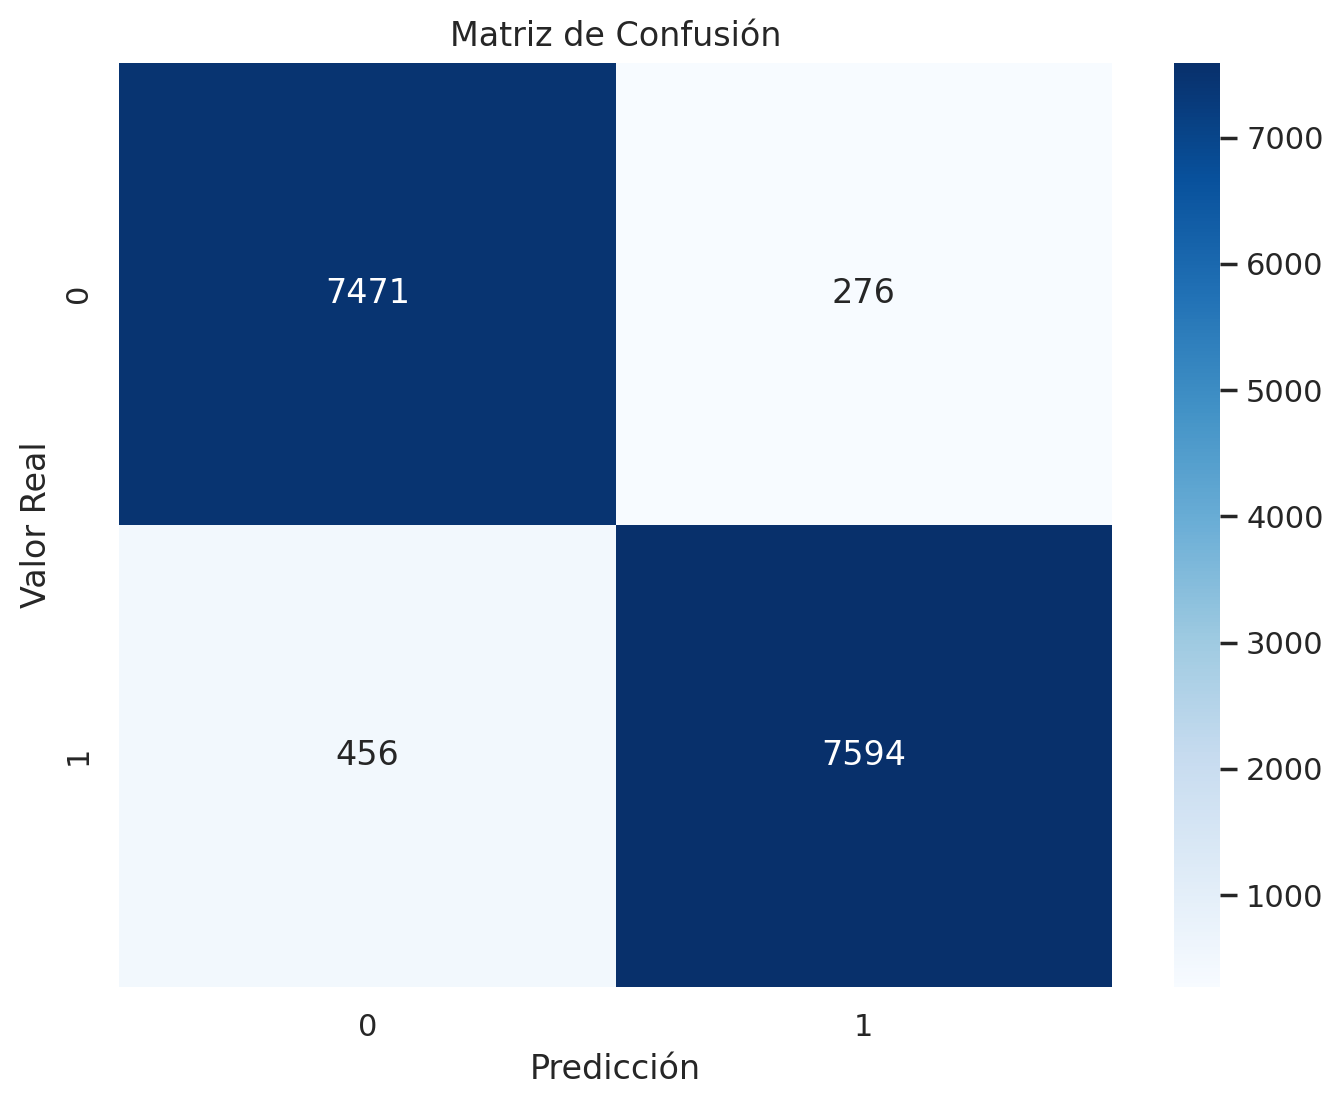

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura para la matriz de confusión
plt.figure(figsize=(8, 6))

# Crear una matriz de confusión usando el heatmap de Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])

# Etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar la gráfica
plt.show()

# Evaluación  del modelo

In [ ]:
# Importar las funciones necesarias
from sklearn.metrics import precision_score, recall_score, f1_score

# Aplicar transformaciones al conjunto de pruebas
data_test['TWEET_TEXT'] = data_test['TWEET_TEXT'].apply(removeHTML)
data_test['TWEET_TEXT'] = data_test['TWEET_TEXT'].apply(clean)
count_test = count_vect.transform(data_test['TWEET_TEXT'])

# Crear el conjunto de pruebas
X_test = count_test
y_test = data_test['trastorno'].values

# Predicciones en el conjunto de pruebas
y_test_pred = lr_model.predict(X_test)

# Calcular precisión en el conjunto de pruebas
precision_test = precision_score(y_test, y_test_pred)

# Calcular exhaustividad (recall) en el conjunto de pruebas
recall_test = recall_score(y_test, y_test_pred)

# Calcular puntuación F1 en el conjunto de pruebas
f1_test = f1_score(y_test, y_test_pred)

# Calcular exactitud en el conjunto de pruebas
accuracy_test = lr_model.score(X_test, y_test) * 100

# Mostrar precisión en el conjunto de pruebas
print("Precisión (test): {:.2f}".format(precision_test))

# Mostrar exhaustividad en el conjunto de pruebas
print("Exhaustividad (test): {:.2f}".format(recall_test))

# Mostrar puntuación F1 en el conjunto de pruebas
print("Puntuación F1 (test): {:.2f}".format(f1_test))

# Mostrar la exactitud en el conjunto de pruebas
print("Exactitud (test): {:.2f}%".format(accuracy_test))


Precisión (test): 0.97
Exhaustividad (test): 0.94
Puntuación F1 (test): 0.95
Exactitud (test): 95.31%


In [ ]:
# Mostrar precisión en el conjunto de pruebas
print("Precisión (test): {:.2f}%".format(precision_test*100))

# Mostrar exhaustividad en el conjunto de pruebas
print("Exhaustividad (test): {:.2f}%".format(recall_test*100))

# Mostrar puntuación F1 en el conjunto de pruebas
print("Puntuación F1 (test): {:.2f}%".format(f1_test*100))

# Mostrar la exactitud en el conjunto de pruebas
print("Exactitud (test): {:.2f}%".format(accuracy_test))

Precisión (test): 96.67%
Exhaustividad (test): 93.87%
Puntuación F1 (test): 95.25%
Exactitud (test): 95.31%


# matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = lr_model.predict(X_test)

# Obtiene la matriz de confusión. Las filas corresponden a las clases reales,
# y las columnas a las predicciones.
#
cm = confusion_matrix(y_test, y_pred)

# Obtiene la proporción real de comentarios positivos,
# y la proporción etiquetados.
#
prop_real = np.sum(y_test)/len(y_test)
prop_etiqutados = (cm[0,1]+cm[1,1])/len(y_test)

print("Matriz de confusión: \n\n", cm, "\n")
print('Proporción de comentarios positivos: %.2f'% prop_real)
print('Proporción de comentarios positivos etiquetados: %.2f'% prop_etiqutados)

Matriz de confusión: 

 [[13443   451]
 [  856 13103]] 

Proporción de comentarios positivos: 0.50
Proporción de comentarios positivos etiquetados: 0.49


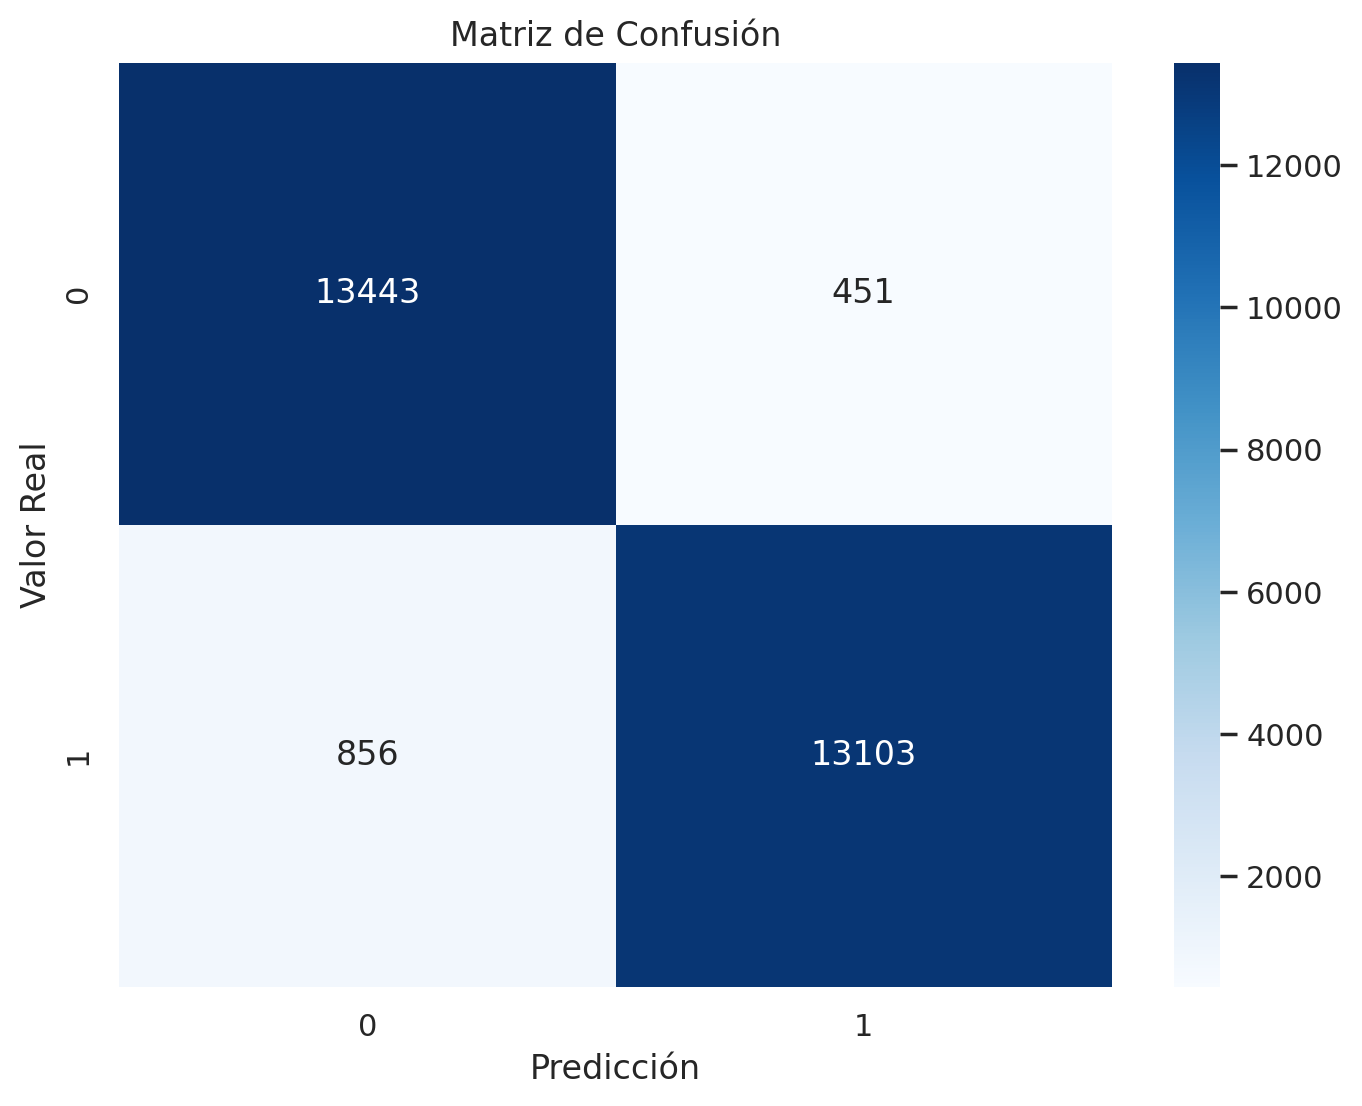

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura para la matriz de confusión
plt.figure(figsize=(8, 6))

# Crear una matriz de confusión usando el heatmap de Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])

# Etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar la gráfica
plt.show()

# GUARDAR EL MODELO ENTRENADO

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import joblib
import os
# # Directorio para guardar modelos entrenados
# model_dir = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba (control vs ansiedad)/TWEETS_depresivos (BoW) (RL-CV=10).pkl'
# model_filename = 'TWEETS_Ansiedad(RL).pkl'
# model_path = os.path.join(model_dir, model_filename)

# # Guardar el modelo entrenado
# joblib.dump(lr_model, model_path)
model_path ='/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba (control vs ansiedad)/TWEETS_depresivos (BoW) (RL-CV=10).pkl'
# Cargar el modelo entrenado
loaded_model = joblib.load(model_path)

# Texto de ejemplo para predecir
new_tweet = " Lluvia ☔ , tormenta eléctrica 🌩 ... Plan arrunchis, buenas pelis y mi mejor amigo al lado 🐶"


# Preprocesamiento del texto
new_tweet_cleaned = clean(removeHTML(new_tweet))
new_tweet_extracted = extractTerms(new_tweet_cleaned)
new_tweet_combined = ' '.join(new_tweet_extracted)
new_tweet_tfidf = count_vect.transform([new_tweet_combined])

# Hacer la predicción y obtener las probabilidades de ambas clases
proba_prediction = loaded_model.predict_proba(new_tweet_tfidf)
control_prob = proba_prediction[0][0]  # Probabilidad de ser control
depresion_prob = proba_prediction[0][1]  # Probabilidad de ser ansiedad

# Imprimir el resultado de la predicción y las probabilidades
print(new_tweet)
print('------------------------------------------------------------------')
if proba_prediction[0][0] > proba_prediction[0][1]:
    print("Este tweet No es de ansiedad")
    print("Probabilidad de que el tweet No sea  de ansiedad: {:.2f}%".format(control_prob * 100))
    print("Probabilidad de que el tweet  sea de ansiedad: {:.2f}%".format(depresion_prob * 100))
else:
    print("Este tweet es de ansiedad")
    print("Probabilidad de que el tweet No sea  de ansiedad: {:.2f}%".format(control_prob * 100))
    print("Probabilidad de que el tweet  sea de ansiedad: {:.2f}%".format(depresion_prob * 100))


 Lluvia ☔ , tormenta eléctrica 🌩 ... Plan arrunchis, buenas pelis y mi mejor amigo al lado 🐶
------------------------------------------------------------------
Este tweet No es de ansiedad
Probabilidad de que el tweet No sea  de ansiedad: 99.74%
Probabilidad de que el tweet  sea de ansiedad: 0.26%
